In [9]:
# Read data generated in the previous workshop
import requests

url = 'https://raw.githubusercontent.com/ezzybala/NLP-pipeline-Tweeter-Sentiment-Analysis/refs/heads/main/processed_data/processed_train_tweets.csv'
response = requests.get(url)

if response.status_code == 200:
    with open('processed_train_tweets.csv', 'wb') as file:
        file.write(response.content)
    print('CSV file downloaded successfully!')
else:
    print(f'Failed to download CSV file. Status code: {response.status_code}')

CSV file downloaded successfully!


In [10]:
import pandas as pd
train_df = pd.read_csv("processed_train_tweets.csv")
train_df.head()

,tweet,sentiment,clean_tweet,tokenized_sents,word_list,word_list_without_sw,final_tweet
0,@user when a father is dysfunctional and is s...,0,user when a father is dysfunctional and is so ...,1,"['user', 'when', 'a', 'father', 'is', 'dysfunc...","['user', 'father', 'dysfunctional', 'selfish',...",user father dysfunctional selfish drag kid dys...
1,@user @user thanks for #lyft credit i can't us...,0,user user thanks for lyft credit i cannot use ...,1,"['user', 'user', 'thanks', 'for', 'lyft', 'cre...","['user', 'user', 'thanks', 'lyft', 'credit', '...",user user thanks lyft credit use offer wheelch...
2,bihday your majesty,0,bihday your majesty,1,"['bihday', 'your', 'majesty']","['bihday', 'majesty']",bihday majesty
3,#model i love u take with u all the time in ...,0,model i love you take with you all the time in...,1,"['model', 'i', 'love', 'you', 'take', 'with', ...","['model', 'love', 'take', 'time', 'mobile_phon...",model love take time mobile_phone kissing_face...
4,factsguide: society now #motivation,0,factsguide society now motivation,1,"['factsguide', 'society', 'now', 'motivation']","['factsguide', 'society', 'motivation']",factsguide society motivation


In [11]:
train_df.shape


(31962, 7)

In [12]:
train_df.sentiment.value_counts()

,count
sentiment,
0,29720
1,2242


In [13]:
# define a dictionary to map numbers to corresponding sentiments
map = {0: 'Positive', 1: 'Negative'}

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# create a count vertorizer object and set the size of the vocabulary to 8000
cv = CountVectorizer(max_features = 8000, ngram_range = (1,2))

# convert the dtype of final tweet column to unicode string and convert them to bag of words
X = cv.fit_transform(train_df['final_tweet'].values.astype('U')).toarray()
y = train_df['sentiment']

In [15]:
print("X: ", X[0:5])
print("y: ",y[0:5])

X:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y:  0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("number of tweets in training dataset: ", len(X_train))
print("number of tweets in testing dataset: ", len(X_test))

number of tweets in training dataset:  25569
number of tweets in testing dataset:  6393


In [17]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [18]:
mnb_model = MultinomialNB()
bnb_model = BernoulliNB()
lr_model = LogisticRegression(max_iter = 300, multi_class = "multinomial")
rfc_model = RandomForestClassifier(n_estimators = 50, random_state = 2, max_depth = 25)
tree_model = DecisionTreeClassifier(max_depth = 30)

In [19]:
def train_classifier_get_confusion_metric(model, X_train, y_train, X_test, y_test):
    # train the model on training data
    model.fit(X_train, y_train)

    # evaluate the model
    y_pred = model.predict(X_test)

    # calculate the performance metrics
    confusion = confusion_matrix(y_test, y_pred)

    return confusion

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Confusion Matrix:  [[5874   63]
 [ 207  249]]


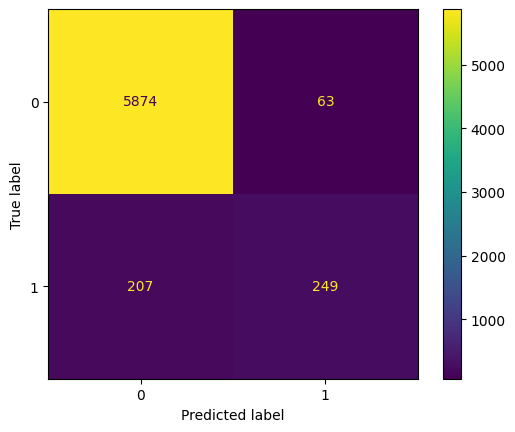

In [20]:
lr_confusion = train_classifier_get_confusion_metric(lr_model, X_train, y_train, X_test, y_test)

print("Confusion Matrix: ", lr_confusion)
disp = ConfusionMatrixDisplay(lr_confusion, display_labels = map.keys())
disp.plot()
plt.show()

Model:  Multinomial Naive Bayes
Accuracy:  0.9429063037697482
Precision:  0.5769881556683587
Recall:  0.7478070175438597
F1:  0.6513849092645654
Confusion Matrix:  [[5687  250]
 [ 115  341]]


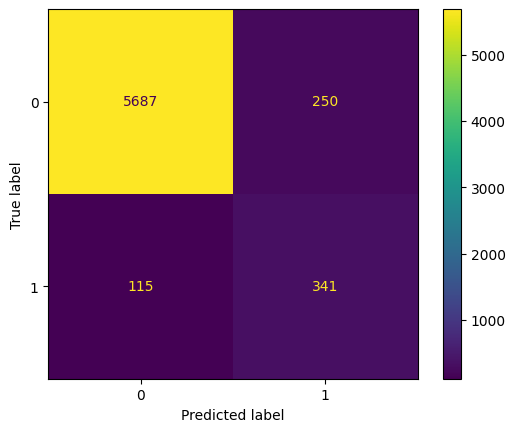

--------------------------------------------------
Model:  Bernoulli Naive Bayes
Accuracy:  0.9468168309088065
Precision:  0.6283185840707964
Recall:  0.6228070175438597
F1:  0.6255506607929515
Confusion Matrix:  [[5769  168]
 [ 172  284]]


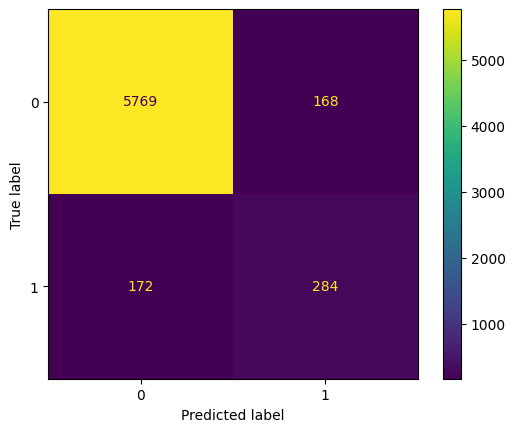

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Model:  Logistic Regression
Accuracy:  0.9577663068981699
Precision:  0.7980769230769231
Recall:  0.5460526315789473
F1:  0.6484375
Confusion Matrix:  [[5874   63]
 [ 207  249]]


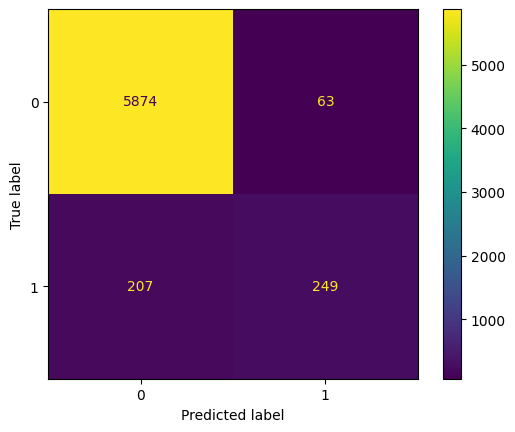

--------------------------------------------------
Model:  Random Forest Classifier
Accuracy:  0.9375879868606288
Precision:  1.0
Recall:  0.125
F1:  0.2222222222222222
Confusion Matrix:  [[5937    0]
 [ 399   57]]


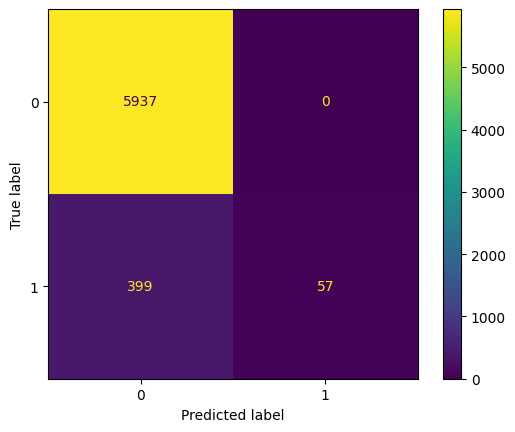

--------------------------------------------------
Model:  Decision Tree Classifier
Accuracy:  0.9491631471922415
Precision:  0.8104265402843602
Recall:  0.375
F1:  0.512743628185907
Confusion Matrix:  [[5897   40]
 [ 285  171]]


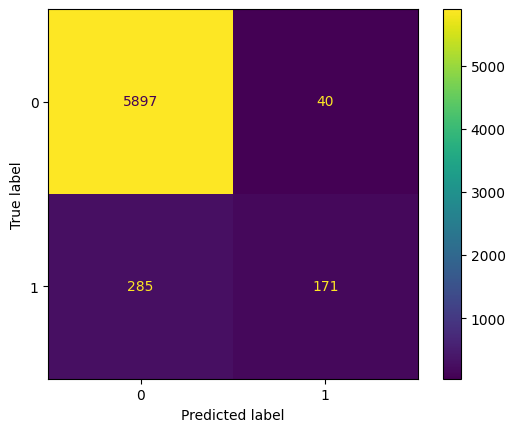

--------------------------------------------------


In [21]:
def train_classifier(model, X_train, y_train, X_test, y_test):
    # train the model on training data
    model.fit(X_train, y_train)

    # evaluate the model
    y_pred = model.predict(X_test)

    # calculate the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, confusion, recall, f1

# create a dictionary of models
models = {
    'Multinomial Naive Bayes': mnb_model,
    'Bernoulli Naive Bayes': bnb_model,
    'Logistic Regression': lr_model,
    'Random Forest Classifier': rfc_model,
    'Decision Tree Classifier': tree_model
}

# create a list to store performance of models
accuracy_scores = []
precision_scores = []
confusions = []
recall_scores = []
f1_scores = []

for model_name, model in models.items():

    # train the model on training data
    cur_accuracy, cur_precision, cur_confusion, cur_recall, cur_f1 = train_classifier(model, X_train, y_train, X_test, y_test)

    # print model performance
    print("Model: " , model_name)
    print("Accuracy: ", cur_accuracy)
    print("Precision: ", cur_precision)
    print("Recall: ", cur_recall)
    print("F1: ", cur_f1)
    print("Confusion Matrix: ", cur_confusion)
    disp = ConfusionMatrixDisplay(cur_confusion, display_labels = map.keys())
    disp.plot()
    plt.show()

    print('-' * 50)

    # append the performance metrics to a list
    accuracy_scores.append(cur_accuracy)
    precision_scores.append(cur_precision)
    confusions.append(cur_confusion)
    recall_scores.append(cur_recall)
    f1_scores.append(cur_f1)

In [22]:
performance_df = pd.DataFrame({'Algorithm': models.keys(),
                                'Accuracy': accuracy_scores,
                                'Precision': precision_scores,
                                'Recall': recall_scores,
                                'F1': f1_scores,
                                'Confusion': confusions}).sort_values("Accuracy", ascending = False, ignore_index = True)

performance_df

,Algorithm,Accuracy,Precision,Recall,F1,Confusion
0,Logistic Regression,0.957766,0.798077,0.546053,0.648438,"[[5874, 63], [207, 249]]"
1,Decision Tree Classifier,0.949163,0.810427,0.375000,0.512744,"[[5897, 40], [285, 171]]"
2,Bernoulli Naive Bayes,0.946817,0.628319,0.622807,0.625551,"[[5769, 168], [172, 284]]"
3,Multinomial Naive Bayes,0.942906,0.576988,0.747807,0.651385,"[[5687, 250], [115, 341]]"
4,Random Forest Classifier,0.937588,1.000000,0.125000,0.222222,"[[5937, 0], [399, 57]]"
